In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import cufflinks as cf
import random
import plotly.offline
import plotly.express as px
import folium
from datetime import timedelta
from folium import plugins
from folium.plugins import HeatMapWithTime

In [20]:
# Loading files do dfs
patInf = pd.read_csv('data/PatientInfo.csv')
govMeas = pd.read_excel('data/govmeas.xlsx')
timedf = pd.read_csv('data/Time.csv')
patRou = pd.read_csv('data/PatientRoute.csv')

In [21]:
timedf['date'] = pd.to_datetime(timedf['date'], format='%Y-%m-%d')
patInf['confirmed_date'] = pd.to_datetime(patInf['confirmed_date'], format='%Y-%m-%d')
patInf = patInf.rename(columns={'confirmed_date':'date'}) 

In [22]:
# Setting the days after the first test
timedf['days_since0'] = timedf['date'].apply(lambda x: (x-timedf.date.min()).days)

The dataframe depicted above shows very interesting data that is not always present in COVID-19 analysis, which is the amount of tested people. So the goal here is to get an overview of the evolution of the deceased, but also to check real numbers for mortality.

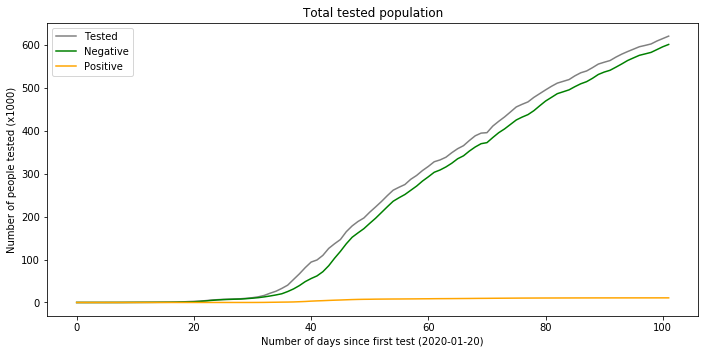

In [23]:
# Setting figure size and labels
plt.figure(figsize=[11.67,5.39])
plt.ylabel('Number of people tested (x1000)')
plt.xlabel('Number of days since first test ({:})'.format(timedf.date.min().date()))

# Plotting tested, negative and positive numbers
plt.plot(timedf.days_since0,timedf.test/1000,label='Tested',color='grey')
plt.plot(timedf.days_since0,timedf.negative/1000,label='Negative',color='green')
plt.plot(timedf.days_since0,timedf.confirmed/1000,label='Positive',color='orange')

# Setting title, displaying legend and showing plot
plt.title('Total tested population')
plt.legend()
plt.show()

The plot clearly shows a somewhat constant slope right before day 40, which means that mass testing has reached a constant daily average. 

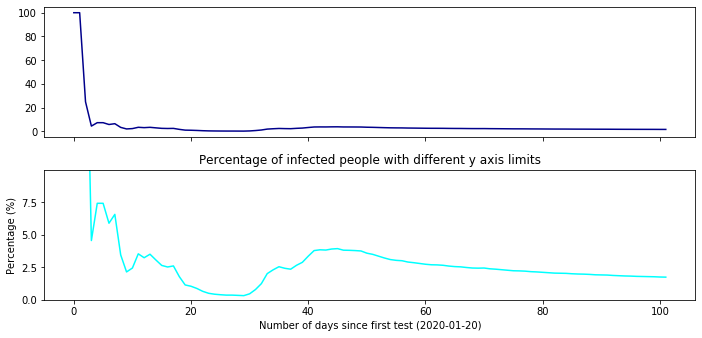

In [24]:
# Setting x and y prior to plotting to make readibility better
x = timedf.index
y = round(timedf.confirmed/timedf.test*100,2)

# Making subplots to show different scales
fig, axs = plt.subplots(2, 1, sharex=True,figsize=[11.67,5.39])
plt.title('Percentage of infected people with different y axis limits')
fig.subplots_adjust(hspace=0.25)

# Plotting first plot
axs[0].plot(x,y,color='darkblue')

# Plotting second plot
axs[1].plot(x,y,color='cyan')
axs[1].set_yticks(np.arange(0, 10, 2.5))
axs[1].set_ylim(0,10)

# Setting axis labels and showing plot
plt.xlabel('Number of days since first test ({:})'.format(timedf.date.min().date()))
plt.ylabel('Percentage (%)')
plt.show()

Just like mentioned before, it can be seen that the fluctuations are bigger when the country had yet to reach a stable amount of daily mass testing. After that, it seem as if the percentage of infected people stabilizes around 2.5%. Out of those 2.5%, it can be seen below the split between released and deceased:

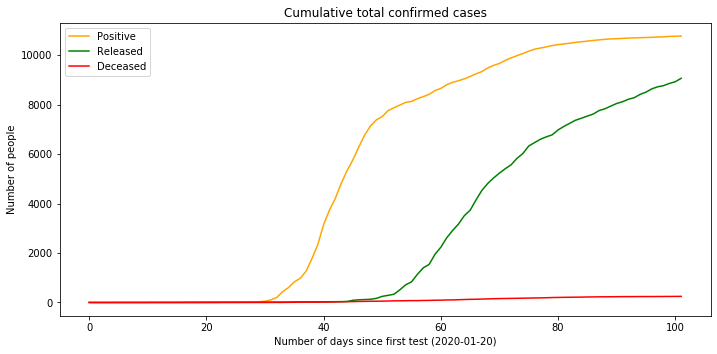

In [25]:
# Setting figure size and axis labels
plt.figure(figsize=[11.67,5.39])
plt.ylabel('Number of people')
plt.xlabel('Number of days since first test ({:})'.format(timedf.date.min().date()))

# Plotting accumulated confirmed, released and deceased people
plt.plot(timedf.days_since0,timedf.confirmed,label='Positive',color='orange')
plt.plot(timedf.days_since0,timedf.released,label='Released',color='green')
plt.plot(timedf.days_since0,timedf.deceased,label='Deceased',color='red')

# Setting title, displaying legend, showing plot
plt.title('Cumulative total confirmed cases')
plt.legend()
plt.show()

Analyzing the percentage of deceased by positive individuals:

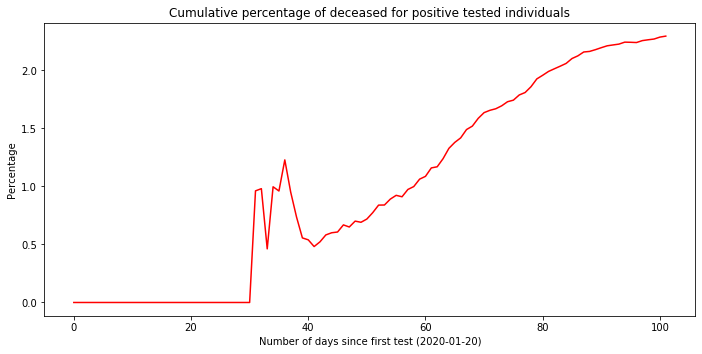

In [26]:
# Setting size and axis labels
plt.figure(figsize=[11.67,5.39])
plt.ylabel('Percentage')
plt.xlabel('Number of days since first test ({:})'.format(timedf.date.min().date()))

# Plotting accumulated percentage of deceased by total positive individuals
plt.plot(timedf.days_since0,round(timedf.deceased/timedf.confirmed*100,5),color='red')

# Setting title and showing plot
plt.title('Cumulative percentage of deceased for positive tested individuals')
plt.show()

And the more expressive figure of percentage of deceased by total tested individuals (more closely related to the global mortalility of the virus)

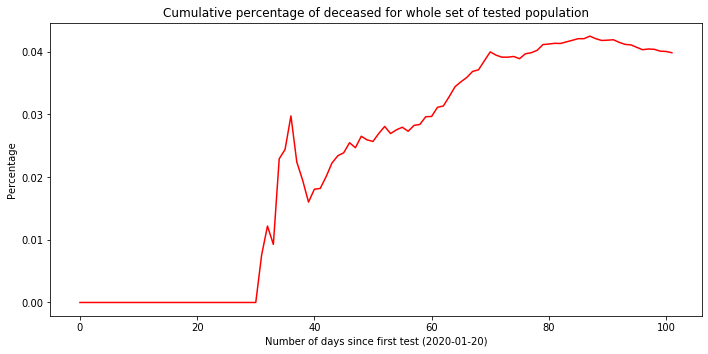

In [27]:
# Setting size and axis labels
plt.figure(figsize=[11.67,5.39])
plt.ylabel('Percentage')
plt.xlabel('Number of days since first test ({:})'.format(timedf.date.min().date()))

# Plotting accumulated percentage of deceased of total tested population
plt.plot(timedf.days_since0,round(timedf.deceased/timedf.test*100,5),color='red')

# Setting title and showing plot
plt.title('Cumulative percentage of deceased for whole set of tested population')
plt.show()

This plot shows the real percentage of deceased people, which is much smaller than the usual present in many news about the virus, which only take into account people who had the disease (around 2,5%, as previously shown), making this one much lower, currently at:

In [28]:
# Getting exactly how much is the deceased over total tested population percentage at the most recent date
print(round(timedf.deceased[np.where(timedf.days_since0 == 
                             timedf.days_since0.max())[0][0]]/timedf.test[np.where(timedf.days_since0 == 
                                                                               timedf.days_since0.max())[0][0]]*100,4),'%')

0.0398 %


Less than 0,04%. That is the true global mortalility of the disease in South Korea.

Also interesting to analyze is the daily numbers for each of the attributes present there. Below, attributes will be added that correspond to those daily variations:

In [29]:
# Obtaining daily values from cumulative values
timedf['conf_on_day'] = timedf['confirmed'].diff().fillna(timedf['confirmed'])
timedf['test_on_day'] = timedf['test'].diff().fillna(timedf['test'])
timedf['neg_on_day'] = timedf['negative'].diff().fillna(timedf['negative'])
timedf['dec_on_day'] = timedf['deceased'].diff().fillna(timedf['deceased'])
timedf['rel_on_day'] = timedf['released'].diff().fillna(timedf['released'])

The amount of people tested per day:

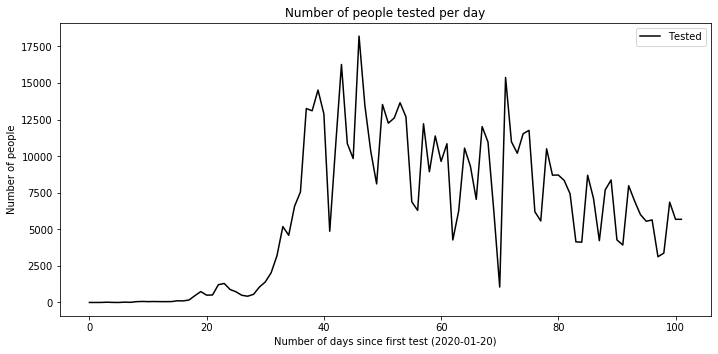

In [30]:
# Setting size and axis labels
plt.figure(figsize=[11.67,5.39])
plt.ylabel('Number of people')
plt.xlabel('Number of days since first test ({:})'.format(timedf.date.min().date()))

# Plotting tests per day
plt.plot(timedf.days_since0,timedf.test_on_day,label='Tested',color='black')

# Setting title, displaying legend and showing plot
plt.title('Number of people tested per day')
plt.legend()
plt.show()

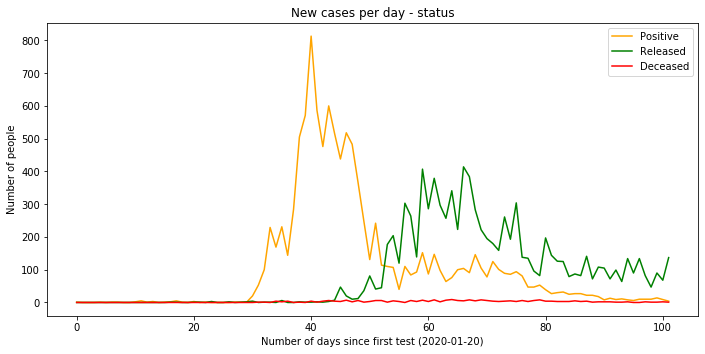

In [31]:
# Setting size and axis labels
plt.figure(figsize=[11.67,5.39])
plt.ylabel('Number of people')
plt.xlabel('Number of days since first test ({:})'.format(timedf.date.min().date()))

# Plotting new positive, released and deceased cases per day
plt.plot(timedf.days_since0,timedf.conf_on_day,label='Positive',color='orange')
plt.plot(timedf.days_since0,timedf.rel_on_day,label='Released',color='green')
plt.plot(timedf.days_since0,timedf.dec_on_day,label='Deceased',color='red')

# Setting title, displaying legend and showing plot
plt.title('New cases per day - status')
plt.legend()
plt.show()

# <font color=blue>3)</font> Data Analysis

First it will be attempted to understand if there are any government measures which yielded reduction in the disease spread and, therefore, that can be more recommended to other countries. Then, a general demographic description of the infected population will be made (based on gender and age group), followed by a geographical description of how the disease has spread throughout the South Korean territory.

### Government Measures

In [32]:
df = patInf.sort_values(by=['date']).reset_index(drop=True)

#Removing entries without age, sex or province information (loss of 1.9% of total DB)
df = df.dropna(subset=['age', 'sex','province'])
df = pd.get_dummies(df, columns=['state'])

In [33]:
# Setting new attribute of days since first action, adding the amount of days between first action and first datapoint
# from df dataframe
govMeas['days_since0'] = govMeas['DATE_IMPLEMENTED'].apply(lambda x: (x-govMeas.DATE_IMPLEMENTED.min()).days +
                                                           (govMeas.DATE_IMPLEMENTED.min()-df.date.min()).days)
govMeas = govMeas.sort_values(by=['days_since0'])

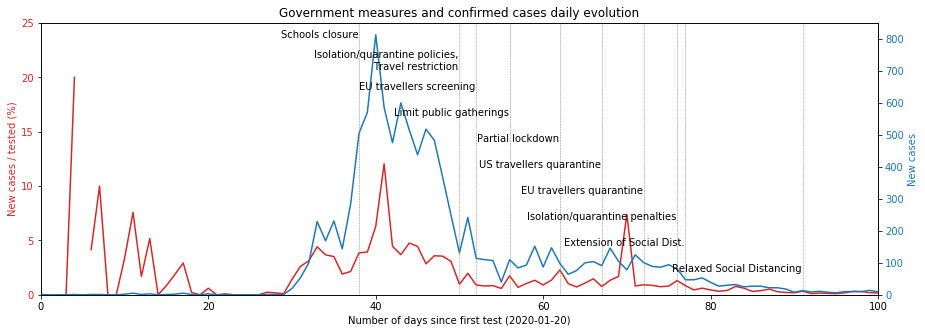

In [34]:
fig, ax1 = plt.subplots()

# Creating left-hand y-axis, plotting percentage of new cases per total tested cases
color = 'tab:red'
ax1.set_xlabel('Number of days since first test ({:})'.format(timedf.date.min().date()))
ax1.set_ylabel('New cases / tested (%)', color=color)
ax1.set_ylim([0, 25])
ax1.set_xlim([0,100])
ax1.plot(timedf.days_since0, timedf.conf_on_day/timedf.test_on_day*100, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating right-hand y-axis, plotting new cases per day
ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('New cases', color=color)
ax2.plot(timedf.days_since0, timedf.conf_on_day, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 850])

# Setting figure dimensions
fig.set_figheight(5)
fig.set_figwidth(15)

# Setting tile
plt.title('Government measures and confirmed cases daily evolution')

# Creating a step to annotate government measures in cascade style
step = timedf.conf_on_day.max()/len(govMeas)

# Setting initial place and iteratable one
init = timedf.conf_on_day.max()
current = timedf.conf_on_day.max() + step

# Making a vertical line and annotating its test on the left for each measure
for cat,day in zip(govMeas.MEASURE,govMeas.days_since0):
    current -= step
    plt.axvline(linewidth=0.5, color='gray',x=day,ls='--')
    plt.annotate(cat, xy=(day-0.1,current), verticalalignment='center', horizontalalignment='right',
                annotation_clip=True)
    
plt.show()

About the plot above: left y-axis contains the percentage of new cases per day over total amount of tested people, and the y-axis on the right contains the abosulte number of new cases per day. Each government actions is delimited be the gray vertical bar on its right side.

It is hard to pinpoint if there were reductions in the number of infected people (both proportional to testing and absolute) since it is expected to exist a delay between measures and results. It can be seen a general reduction in infections after a peak around day 40, while the first measure was of schools closure on day 38. One possible explanation is that people develop individual and group awareness after the government has clearly shown the seriousness of the situation by closing schools.

All other measures might have maintained what was already reached by the population. Therefore, the plot is not sufficient to assess which kind of government measure yields best results without making dangerous assumptions.

### Demographics

This time, using the dataset with information from the patients. 

Inspection of the plot above reveals the following:
* There are much more women with the disease for age groups above 40 years old. On average, 66% more. According to, the population of South Korea above 40 years old has a split of x/y women/men, so this difference is expressive;
* Despite of that, there are much more male deaths in all age groups but one, 80s;
* There were no deaths of people with less than 30 years old.

### Geographical Dynamics

In [35]:
locs = patRou.groupby('province').mean().reset_index()[['province','latitude','longitude']]

# Manually appending Sejong province, which was not on the dataset
locs = locs.append({'province' : 'Sejong' , 'latitude' : 36.560407, 'longitude':127.258044} , ignore_index=True)

In [36]:
# Creating a confirmed attribute from the other 3
df['Confirmed'] = df['state_deceased'] + df['state_isolated'] + df['state_released']

# Grouping by date and province
temp = df.groupby(['date','province']).sum().reset_index()[['province','date','state_deceased',
                                                            'state_isolated','state_released','Confirmed',]]

temp = temp.rename(columns={'state_deceased':'Deceased',
                                  'state_isolated':'Isolated',
                                  'state_released':'Released'})

df_plot = pd.DataFrame(columns=temp.columns)

# Getting the cumulative sum for each state by date and province
for province in temp.province.unique():
    temp2 = temp[temp['province']==province]
    temp2['Confirmed'] = temp2['Confirmed'].cumsum()
    temp2['Released'] = temp2['Released'].cumsum()
    temp2['Deceased'] = temp2['Deceased'].cumsum()
    temp2['Isolated'] = temp2['Isolated'].cumsum()
    df_plot = df_plot.append(temp2, ignore_index=True)

# Merging the locations with the data so that geo-plots are possible
df_plot = pd.merge(df_plot,locs,on='province',how='outer')
df_plot = df_plot.sort_values(by=['date'])

In [39]:
# list where, for each time, coordinates will have the amount of occurrences
df_time_list = []

# Adding both present and past numbers so that the spatio-temporal plot is not only a picture of the current moment,
# but rather and evolution that stores values from past times.
for time in df_plot.date.sort_values().unique():
    df_time_list.append(df_plot.loc[df_plot.date <= time, ['latitude', 'longitude', 'Confirmed']].groupby([
        'latitude','longitude']).sum().reset_index().values.tolist())

mapSK = folium.Map(width=900,height=700,location=(35.5,128), zoom_start=7, tiles='Stamen Terrain')

# Adding circles to mark the provinces with hovering interactivity
for province in locs.province:
    folium.Circle(radius=1, location=[locs[locs['province']==province].latitude, 
                                        locs[locs['province']==province].longitude],
                  tooltip=province,color='crimson', fill=True,).add_to(mapSK)

# Create heatmap with movie
HeatMapWithTime(df_time_list, radius=45, gradient={0.2: 'blue', 0.4: 'lime', 0.7: 'orange', 1: 'red'},
                min_opacity=0.3, max_opacity=0.9, use_local_extrema=True).add_to(mapSK)

# Display movie
mapSK

Taking into account that the heat map is according to percentage of samples, the first frame is showing that all of the sample are on the same spot, in the province of Incheon. The disease then has its focal point in Seoul around day 6, and spreads much more throughout the country by day 16.

Day 21 marks the hotspot in a new location, north of Daegu, called Gyeongsangbuk-do, which will be until the end of the timeline the highest incidence of the disease.

In order to view those fluctuations of confirmed people, but also of deceased, released and isolated in a more easy-to-grasp format, it will be shown below a bar plot for each province with date as animation frames.

In [67]:
df_plot['date'] = pd.to_datetime(df_plot['date'], format='%Y-%m-%d')

In [68]:
df_plot = df_plot.set_index(['province', 'date']).reindex(pd.MultiIndex.from_product([df_plot['province'].unique(), df_plot['date'].unique()], 
                                       names=['province', 'date']))

In [69]:
df_plot = df_plot.groupby(level='province').ffill().dropna().sort_index(level='date').reset_index()

In [70]:
df_plot['Days'] = df_plot['date'].apply(lambda x: (x-df_plot.date.min()).days)

In [71]:
fig = px.bar(df_plot,x='province',y='Confirmed',animation_frame='Days',animation_group='province',
            hover_name='province',hover_data=['Confirmed','Isolated','Released','Deceased'],
            title='Confirmed cases of COVID-19 per province',opacity=0.75)

# Setting background to transparent
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)',
                   'paper_bgcolor': 'rgba(0, 0, 0, 0)',})

# Ordering bars and setting figure size
fig.update_layout(xaxis={'categoryorder':'total descending'},width=900,height=600)

# Not displaying axis labels
fig.update_yaxes(title_text='', automargin=True)
fig.update_xaxes(title_text='', tickfont=dict(size=10))

fig.show()

Now it becomes very easy to analyze and compare the hotspots that were shown in the geographical map. Hover the mouse over the bars to get all information available on the statistics of the disease per province.

In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import eli5
from eli5 import show_prediction
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
import plotly
from plotly import graph_objs as go, offline as po, tools
import numpy as np
import json
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import HTML
import plotly.graph_objs as go
from ipywidgets import interact
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
from IPython.display import Image

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
# Dataset
## Load data
path = "data/PatientInfo.csv"
df = pd.read_csv(path)

In [4]:
# Dataprep
# Reduce data 
df.drop(columns=['patient_id','infection_case', 'symptom_onset_date', 'global_num', 'birth_year', 'country', 'city', 'infection_order', 'infected_by', 'contact_number', 'released_date', 'deceased_date'], inplace = True)

# New column "Days since first case"
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], errors='coerce')
firstCase = df['confirmed_date'].min()
df['Days since first case'] = df['confirmed_date'] - firstCase
df.drop(columns = ['confirmed_date'], inplace = True)

# Binarising 
df = df[df['sex'].notna()]
gender = {'male': 0,'female': 1} 
df.sex = [gender[item] for item in df.sex]

# OneHotEncoding
df = pd.get_dummies(df, columns=["disease"], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=["province"], prefix='', prefix_sep='')

# Clean age
df['age'] = df['age'].str.replace(r's$', '')
df = df[df['age'].notna()]
df = df.astype({"age": int})

# Convert timedeltas to integer
df['Days since first case'] = df['Days since first case'].dt.days

# Remove "Isolated state"
df = df[df['state'] != 'isolated']

# Rename a column
df = df.rename(columns={'True': 'Existing illness'})

In [5]:
# Split into test and training data
X = df.drop(columns = ['state', 'Daegu'])
y = df[['state']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, shuffle=True, random_state=5)

In [6]:
# Train model with tuned parameters
rfc = RandomForestClassifier(max_depth=20, max_features=2, n_estimators=20, random_state=5)
rfc = rfc.fit(X_train,y_train.values.ravel())

# <span style="color:orange">3:</span> What affects risk of fatal attacks for individuals

In this section anonymised health data from 3388 covid-19 patients in Korea will be analysed, with the goal of determining which factors increase the risk of having a fatal case, and which does not. 

For each patient, the following data has been used for the analysis:
* The sex of the patient
* The age of the patient
* When the patient contracted covid-19 relative to the first case in the county
* If the patient had an existing illness together with covid-19
* What region the patient is from

The analysis is done using a Random Forest Classificaiton Machine-learning model, and in the following you will be walked through the following parts in order.

1. Presentation of the model and its performance
1. Analysis of the results
1. Presentation of a risk-profiling tool for you to play around with the model yourself

## <span style="color:orange">3.1:</span> The model and how it performs

In [22]:
out = widgets.Output(layout={'border': '0px solid black'})
with out:
    im = Image(filename="images/mathematical.gif")
    display(im)
out

Output(layout=Layout(border='0px solid black'))

In a nutshell, the model works by taking information about the patients and then tries to infer some rules to determine which people will suffer a fatal case or not. 

A rule could for instance be: If the patient is 'male' and 'over 80' and 'was the first to get covid-19' and 'has an existing illness' and is from 'Seoul', then that person is likely to suffer a fatal case. 

Many rules like these are then combined together into an ensemble of rules to create a model that is capable of pinpointing if a person is likely to suffer a fatal case or not. 

To test how good the model is, it is evaluated on a number of patients that it has not seen before to see if the rule generalises well. Below, a graph showing how many the model predicted to be:

1. 'Deceased' that were *indeed* 'Deceased'
1. 'Released' that were *indeed* 'Released'
1. 'Deceased' that were *actually* 'Released'
1. 'Released' that were *actually* 'Deceased'

The data has been represented as a percent, but by hovering over each square, you can see how many people it actually was!

In [7]:
# Get data
y_pred = rfc.predict(X_test)
cmNorm = confusion_matrix(y_test, y_pred, normalize='true').round(2)
cmRaw = confusion_matrix(y_test, y_pred, normalize=None)

# Invert it manually to fit heatmap
cmNorm = [[0.01, 0.99],
          [0.4, 0.6]]

cmRaw = [[12, 18],
         [8, 733]]

In [24]:
# Set labels
x = ['Deceased', 'Released']
y =  ['Released', 'Deceased']

# Custom colorscale to match Sklearn
colorscale = [[0, 'rgb(247, 251, 255)'], [0.5, 'rgb(102, 171, 212)'], [1, 'rgb(8,49,107)']]

# Set hovertext of actual numbers 
hover = [["Actual: 6", "Actual: 547"],
         ["Actual: 10", "Actual: 16"]]

# set up figure 
fig = ff.create_annotated_heatmap(cmNorm, x=x, y=y, text = hover, hoverinfo='text', colorscale=colorscale)

# add title
fig.update_layout(title_text="How well did the model performe on unseen data?")

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=20),
                        x=0.5,
                        y=-0.1,
                        showarrow=False,
                        text="What the model predicted",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=20),
                        x=-0.2,
                        y=0.5,
                        showarrow=False,
                        text="What the patient actually was",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200), width=900, height=700)
fig.update_xaxes(side="bottom")

# add colorbar
fig['data'][0]['showscale'] = True
fig

So is the model any good? The model has tried to predict whether each of 579 patients is going to suffer a fatal covid-19 attack or not. Among those 579 patients it guessed 557 of them correct, wrongly predicting 6 patients as 'Deceased' which were in fact 'Released', and 16 patients as 'Released' which were in fact 'Deceased'. Surely this performance is quite good for someone that does not even have a medical degree! 

In the following, the brain of the model will be extracted, and you will have an opportunity to take a look inside of it to see what the model bases its decisions on. 

## <span style="color:orange">3.2:</span> Inside the brain: How does the model make decisions? 

In [25]:
out = widgets.Output(layout={'border': '0px solid black'})
with out:
    im = Image(filename="images/sagan.gif")
    display(im)
out

Output(layout=Layout(border='0px solid black'))

Indeed it does Sagan, and so it does for the predictions of the patients; Except the brain is not actually inside someones head, rather its a set of mathmatical calculations being done on a chip... Anyhow... Time to investigate!

First, a bar-chart will be shown, presenting how important each feature (sex, age, etc.) is to the model when it makes a prediction. The chart can be seen below, try to hover your mouse over some of the bars!

In [26]:
# Extract feature importances for plotting
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
featureNames = feature_importance.index.tolist()
featureImportance = np.multiply(feature_importance.tolist(),100)

# Group regions
regionImportance = sum(featureImportance[4:-1])
featureImportance = featureImportance[0:4]
featureImportance = np.append(featureImportance,regionImportance)
featureNames = featureNames[0:4]
featureNames.append('Regions')
featureNames[0] = 'Sex'
featureNames[1] = 'Age'

In [33]:
# Construct plotly barchart
fig = go.FigureWidget()
fig.layout.title = "Relative importance when predicting chance of survival of COVID-19 patients"
fig.add_bar(x=featureNames, y=featureImportance, text = ['Potentially biased', 'Good predicter', 'Potentially biased', 'Good predicter', 'Potentially biased'])
fig.update_layout(xaxis={'categoryorder':'total descending'}, width=900, height=700)
fig

FigureWidget({
    'data': [{'text': [Potentially biased, Good predicter, Potentially biased,
                …

Hopefully this graph has made you wonder; 'What is relative importance?' and why does some bars say 'Potentially biased' or 'Good predicter' when I hover over them? 

**Relative importance** is simply how important the model thinks a feature is when making rules, and the model thinks features that are good at separating people are better. So if you could say "All women die" and "All men survive", then 'Sex' would be very very important! Luckily this is not the case!

**'Potentially biased' and 'Good predicter'** simply refers to the fact that not all of these features are proven to affect covid-19 fatality. 'Age' and 'Existing illness' are scientifically proven to increase risk of suffering a fatal case, making them 'Good predictors', however, 'Days since first case', 'Regions' and 'Sex' are not. This does not mean that the model could not have discovered something that is in fact true, it just means that there is a chance that the model has found something that it thinks is important, but which in reality is not. For instance, it may think that the region "ABCDEFG" is highly correlated with suffering fatal attacks while in reality its just because this region is a special region only consisting of nursing homes! (Not a real example). 

This graph only tells us how important the model think each feature is, but what does it mean if your 'Age' is 80, and what if it is 20? Time to zoom in some more!


In [29]:
out = widgets.Output(layout={'border': '0px solid black'})
with out:
    im = Image(filename="images/zoom.gif")
    display(im)
out

Output(layout=Layout(border='0px solid black'))

Below you will see an interactive plot of how each feature impacts a prediction. You can choose which feature from the bar-graph you wish to investigate using the dropdown menu (except regions, unfortunately there is nothing to see there!). Have a go at it!

In [31]:
# Get partial dependence graph data

# Sex
sex_y, sex_x = partial_dependence(rfc, X_train, [0])
sex_y = np.multiply(sex_y[0],100)
sex_x = ['Male', 'Female']

# Age
age_y, age_x = partial_dependence(rfc, X_train, [1])
age_y = np.multiply(age_y[0],100)
age_x = age_x[0]

# Days since first case
dsfc_y, dsfc_x = partial_dependence(rfc, X_train, [2])
dsfc_y = np.multiply(dsfc_y[0],100)
dsfc_x = dsfc_x[0]

# Existing illness
ei_y, ei_x = partial_dependence(rfc, X_train, [3])
ei_y = np.multiply(ei_y[0],100)
ei_x = ['No existing illness', 'Existing illness present']

In [32]:
# Make interactive PDP plots

# Show first line
initLine = go.Scatter(x=dsfc_x, y=dsfc_y)

# Construct dropdown menu and graph-changes
updatemenus = [
    {
        'buttons': [
            {
                'method': 'restyle',
                'label': 'Days since first case',
                'args': [
                    {'x': [dsfc_x], 'y': [dsfc_y], 'xaxis': "test"},
                ]
            },
            {
                'method': 'restyle',
                'label': 'Age',
                'args': [
                    {'x': [age_x], 'y': [age_y], 'xaxis': "nooo"},
                ]
            },
            {
                'method': 'restyle',
                'label': 'Existing illness',
                'args': [
                    {'x': [ei_x], 'y': [ei_y]},
                ]
            },
            {
                'method': 'restyle',
                'label': 'Sex',
                'args': [
                    {'x': [sex_x], 'y': [sex_y]},
                ]
            }
        ],
        'direction': 'down',
        'showactive': True,
    }
]

# Update layout based on dropdown
layout = go.Layout(
    title_text = "How each feature impacts a prediction",
    yaxis_title="Chance of survival in %",
    xaxis_title="Value according to dropdown selected",
    width=900, 
    height=500,
    updatemenus=updatemenus,
)

# Plot figure
figure = go.Figure(data=[initLine], layout=layout)
figure

*Age* seems to draw a clear picture, patients above 60 seems to be significantly harder impacted by the disease than those below! *Existing illness* the same, nearly a 50% drop in chance of survival if an existing illness is present. No wonder it is recommended to avoid physical contact with especially sick and elderly!

*Sex* is a quite interesting (no pun intended), it seems that female has an almost 5% higher chance of survival. However, remember that this is 'Potentially biased' and it is known that the dataset contains more female than male, so don't take this as ground through. 

*Days since first case* seems a bit harder to interpret. The feature could show nothing and purely be hidden bias, or perhabs the model is able to see something that we simply don't. Perhabs survival rate is a bit lower in the beginning due to the virus been all new, then it rises as awareness spreads around day 40, and starts flattening out at a generally higher level than earlier after day 70. This graph is hard to interpret, is it bias or is the model on to something. What do you think? 

Interpretting the model has shown some interesting insights of how COVID-19 increases risk of having a fatal case, but besides just knowing this, how could this information be used in a smart way? This aspect will be discovered in the final part of the analysis.

## <span style="color:orange">3.3:</span> Inside the brain: How does the model make decisions? 

In [34]:
out = widgets.Output(layout={'border': '0px solid black'})
with out:
    im = Image(filename="images/phones.gif")
    display(im)
out

Output(layout=Layout(border='0px solid black'))

Most people use their phones every day and carries it all around with them. They watch their news on it, communicate on it, look up recipies on it, heck people use their phones for almost everything; So why use it as a tool in fighting global pandemics? 

South Korea already uses smartphones in battling COVID-19 by providing emergence messages if you have been near a person with COVID19 [source](https://www.aljazeera.com/news/2020/04/korea-smartphone-apps-tracking-coronavirus-won-stop-buzzing-200408074008185.html), so why not use this even more? (Ethical and privacy concerns will not be discussed here). 

Below you will have the opportunity to type in your own personal information, and let the model make a prediction about you as if you had just contracted COVID-19. The model will provide you with two options:
1. **Risk profile:** Where you will get a personalized risk-profile as if it was given to you by the Korean government. The idea is that something like this could be implemented in a COVID-19 app, and let citizens get personalized risk-assessments as an aid in letting people take this more seriously, as something "not happening to you" can sometimes be a bit difficult to understand. 
1. **Prediction info:** Where you will be able to see what the model has based its recommendation on, and whether it predicts that you are likely to suffer a fatal case ('Deceased') from COVID-19 or if you are more likely to survive ('Released'). This has been included for the more tech-savy that wish to investigate how the predictions work hands-on. 

Try to play around with some different inputs and see how to output reacts! (*Pssst! There are three different risk profiles*). 

In [35]:
# Specify sex picker
sexPick = widgets.RadioButtons(options=['Male','Female'],value='Male',layout={'width': 'max-content'})
# Specificy age picker
agePick = widgets.Dropdown(options=[('0', 0), ('10', 10), ('20', 20), 
                                    ('30',30), ('40',40), ('50',50), 
                                    ('60',60),('70',70),('80', 80),('90',90)],
                                    value=20,
                                    layout={'width': 'max-content'},
                                    description='Pick closest:',)
# Specify existing illness picker
eiPick = widgets.RadioButtons(options=['Yes','No'],value = 'No', layout={'width': 'max-content'})

# Specify 'Days since first case' picker
dsfcPick = widgets.IntRangeSlider(value=[20, 40],
                                       min=0,
                                       max=73,
                                       step=1,
                                       description='Approx:',
                                       disabled=False,
                                       continuous_update=False,
                                       orientation='horizontal',
                                       readout=True,
                                       readout_format='d',)

# Specify regions picker
regPick = widgets.Dropdown(options=['Busan','Chungcheongbuk-do','Chungcheongnam-do',
                                    'Daejeon','Gangwon-do','Gwangju','Gyeonggi-do',
                                    'Gyeongsangbuk-do','Gyeongsangnam-do','Incheon',
                                    'Jeju-do','Jeollabuk-do','Jeollanam-do','Sejong','Seoul',
                                    'Ulsan'],
                                    value='Busan',
                                    description='Pick:',
                                    disabled=False,)

# Build tabs
accordion = widgets.Accordion(children=[sexPick,agePick,eiPick,dsfcPick,regPick])
accordion.set_title(0, 'Sex')
accordion.set_title(1, 'Age')
accordion.set_title(2, 'Existing illness')
accordion.set_title(3, 'Days since first case')
accordion.set_title(4, 'Region')
accordion

Accordion(children=(RadioButtons(layout=Layout(width='max-content'), options=('Male', 'Female'), value='Male')…

In [36]:
# Function takes input from widgets and returns person information to be used for prediction
def personalInfo(sex, age, ei, dsfc, reg):

    # Get average dsfc
    dsfc = sum(dsfc)/2
    
    # Set all regions to 0
    busan = 0
    Chungcheongbuk_do = 0
    Chungcheongnam_do = 0
    Daejeon = 0
    Gangwon_do = 0
    Gwangju = 0
    Gyeonggi_do = 0
    Gyeongsangbuk_do = 0
    Gyeongsangnam_do = 0
    Incheon = 0
    Jeju_do = 0
    Jeollabuk_do = 0
    Jeollanam_do = 0
    Sejong = 0
    Seoul = 0
    Ulsan = 0
    
    # Set sex
    if sex == 'Male':
        sex = 0
    else:
        sex = 1
        
    # Set existing illes
    if ei == "Yes":
        ei = 1
    else:
        ei = 0   
    
    # Set region 
    if reg == "Busan":
        busan = 1
    elif reg == "Chungcheongbuk-do":
        Chungcheongbuk_do = 1
    elif reg == "Chungcheongnam-do":
        Chungcheongnam_do = 1
    elif reg == "Daejeon":
        Daejeon = 1
    elif reg == "Gangwon-do":
        Gangwon_do = 1
    elif reg == "Gwangju":
        Gwangju = 1
    elif reg == "Gyeonggi-do":
        Gyeonggi_do = 1
    elif reg == "Gyeongsangbuk-do":
        Gyeongsangbuk_do = 1
    elif reg == "Gyeongsangnam-do":
        Gyeongsangnam_do = 1
    elif reg == "Incheon":
        Incheon = 1
    elif reg == "Jeju-do":
        Jeju_do = 1
    elif reg == "Jeollabuk-do":
        Jeollabuk_do = 1
    elif reg == "Jeollanam-do":
        Jeollanam_do = 1
    elif reg == "Sejong":
        Sejong = 1
    elif reg == "Seoul":
        Seoul = 1
    elif reg == "Ulsan":
        Ulsan = 1
    
    # Construct dataframe for prediction
    X_pred = pd.DataFrame({"sex":[sex], 
                            "age":[age],  
                            "Days since first case":[dsfc],
                            "Existing illness":[ei],
                            "Busan":[busan],
                            "Chungcheongbuk-do":[Chungcheongbuk_do],
                            "Chungcheongnam-do":[Chungcheongnam_do],
                            "Daejeon":[Daejeon],
                            "Gangwon-do":[Gangwon_do],
                            "Gwangju":[Gwangju],
                            "Gyeonggi-do":[Gyeonggi_do],
                            "Gyeongsangbuk-do":[Gyeongsangbuk_do],
                            "Gyeongsangnam-do":[Gyeongsangnam_do],
                            "Incheon":[Incheon],
                            "Jeju-do":[Jeju_do],
                            "Jeollabuk-do":[Jeollabuk_do],
                            "Jeollanam-do":[Jeollanam_do],
                            "Sejong":[Sejong],
                            "Seoul":[Seoul],
                            "Ulsan":[Ulsan]})
    return X_pred

In [37]:
# Function takes a profile for prediction and returns a risk profile
# - HIGH
# - MEDIUM
# - LOW
def riskProfile(personal_info):
    
    # Predict using model
    prediction = rfc.predict_proba(personal_info)
    
    if prediction[0][1] <= 0.5:
        # High risk
        x = "High risk"
    elif (prediction[0][1] > 0.5) & (prediction[0][1] <= 0.8):
        x = "Medium risk"
    else:
        x = "Low risk"
        
    return x

In [52]:
# Construct button with images

highrisk = Image(filename='images/highrisk.png',width=700)
mediumrisk = Image(filename='images/mediumrisk.png')
lowrisk = Image(filename='images/lowrisk.png',width=700)

btn = widgets.Button(description='Get risk-profile')
out = widgets.Output(layout={'border': '0px solid black'})
display(btn)

def btn_eventhandler(obj):
    out.clear_output()
    info = personalInfo(sexPick.value, agePick.value, eiPick.value, dsfcPick.value, regPick.value)
    prof = riskProfile(info)
    with out:
        if prof == "High risk":
            display(highrisk)
        elif prof == "Medium risk":
            display(mediumrisk)
        else:
            display(lowrisk)

btn.on_click(btn_eventhandler)
out

# Construct button with risk predictions

btn2 = widgets.Button(description='Get prediction info')
out = widgets.Output(layout={'border': '0px solid black'})
display(btn2)

def btn_eventhandler(obj):
    out.clear_output()
    info = personalInfo(sexPick.value, agePick.value, eiPick.value, dsfcPick.value, regPick.value)
    with out:
        print("This table shows the prediction y = 'prediction' together with the probability of survival.")
        print("The contribution indicates how much 'Feature' with 'Value' contributed to the prediction.")
        print("Existing illness present = 1. Sex female = 1. Region = 1 means person is from that region.")
        print("If no features specifically lowers chance of survival, the model will have a high <BIAS> towards saying 'Released'.")
        display(show_prediction(rfc, info, show_feature_values=True, feature_names = info.columns.to_numpy()))

btn2.on_click(btn_eventhandler)
out

Button(description='Get risk-profile', style=ButtonStyle())

Button(description='Get prediction info', style=ButtonStyle())

Output(layout=Layout(border='0px solid black'))

------------

Lets wrap it up with some key-takeaways. 

Specifically... 
1. Higher age and existing illness significantly lowers chance of surviving COVID-19
1. Males *might* be slightly more prone to suffering fatal COVID-19 cases 
1. 'Days since first case' was an important feature for the model when trying to pinpoint fatal cases

And on a more general level...
1. Machine learning could be a good tool to learn more about pandemics by utilizing patient data as the pandemic spreads
1. Machine learning could be used to provide personalized recommendations to increase citizens compliance and reduce spreading


In [51]:
out2 = widgets.Output(layout={'border': '0px solid black'})
with out2:
    im = Image(filename="images/bye.gif")
    display(im)
out2

Output(layout=Layout(border='0px solid black'))